In [2]:
!pip install rasterio

In [3]:
from osgeo import gdal
import numpy as np
import rasterio

In [12]:
# Root Path
dem_path = '/content/drive/My Drive/Image Segmentation/'

#Inputs/Sources
# low_res_dem_path = dem_path + 'low_res_dem.tif'
# low_res_dem_filled = dem_path + "low_res_dem_filled.tif"
# low_res_dem_filled_smoothed_1 = dem_path + "low_res_dem_filled_smoothed_1.tif"
# low_res_dem_filled_smoothed_2 = dem_path + "low_res_dem_filled_smoothed_2.tif"
low_res_dem_filled_smoothed_3 = dem_path + "low_res_dem_filled_smoothed_3.tif"
# high_res_dem_path = dem_path + 'low_res_dem.tif'
# high_dem_filled = dem_path + "high_dem_filled.tif"
# high_dem_filled_smoothed = dem_path + "high_dem_filled_smoothed.tif"

#Outputs/Destinations
# aspect_low_res_dem_filled_smoothed_1 = dem_path + "aspect_low_res_dem_filled_smoothed_1.tif"
# slope_low_res_dem_filled_smoothed_1 = dem_path + "slope_low_res_dem_filled_smoothed_1.tif"
# hill_shade_low_res_dem_filled_smoothed_1 = dem_path + "hill_shade_low_res_dem_filled_smoothed_1.tif"

# aspect_low_res_dem_filled_smoothed_2 = dem_path + "aspect_low_res_dem_filled_smoothed_2.tif"
# slope_low_res_dem_filled_smoothed_2 = dem_path + "slope_low_res_dem_filled_smoothed_2.tif"
# hill_shade_low_res_dem_filled_smoothed_2 = dem_path + "hill_shade_low_res_dem_filled_smoothed_2.tif"

aspect_low_res_dem_filled_smoothed_3 = dem_path + "aspect_low_res_dem_filled_smoothed_3.tif"
slope_low_res_dem_filled_smoothed_3 = dem_path + "slope_low_res_dem_filled_smoothed_3.tif"
hill_shade_low_res_dem_filled_smoothed_3 = dem_path + "hill_shade_low_res_dem_filled_smoothed_3.tif"

In [9]:
def calculate_slope(DEM, slope_path):
    gdal.DEMProcessing(slope_path, DEM, 'slope')
    with rasterio.open(slope_path) as dataset:
        slope=dataset.read(1)
    return slope

def calculate_aspect(DEM, aspect_path):
    gdal.DEMProcessing(aspect_path, DEM, 'aspect')
    with rasterio.open(aspect_path) as dataset:
        aspect=dataset.read(1)
    return aspect

def calculate_hillshade(DEM, hill_shade_path):
    gdal.DEMProcessing(hill_shade_path, DEM, 'hillshade')
    with rasterio.open(hill_shade_path) as dataset:
        hillshade=dataset.read(1)
    return hillshade

In [13]:
slope=calculate_slope(DEM=low_res_dem_filled_smoothed_3, slope_path=slope_low_res_dem_filled_smoothed_3)
aspect=calculate_aspect(DEM=low_res_dem_filled_smoothed_3, aspect_path=aspect_low_res_dem_filled_smoothed_3)
hillshade=calculate_hillshade(DEM=low_res_dem_filled_smoothed_3, hill_shade_path=hill_shade_low_res_dem_filled_smoothed_3)

print(type(slope))
print(slope.dtype)
print(slope.shape)

<class 'numpy.ndarray'>
float32
(632, 358)


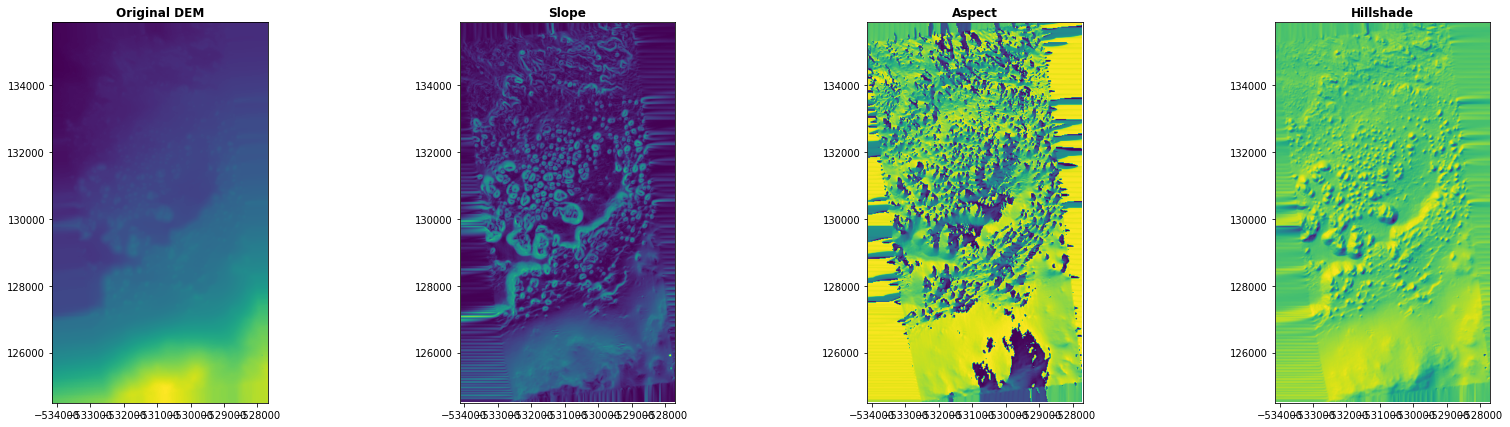

In [14]:
import rasterio.plot
import matplotlib
from matplotlib import pyplot

fig, (ax_original, ax_slope, ax_aspect, ax_hillshade) = pyplot.subplots(1,4, figsize=(28,7))

with rasterio.open(low_res_dem_filled_smoothed_3) as dem:
  rasterio.plot.show(dem, ax=ax_original, title='Original DEM')

with rasterio.open(aspect_low_res_dem_filled_smoothed_3) as aspect:
  rasterio.plot.show(aspect, ax=ax_aspect, title='Aspect')

with rasterio.open(slope_low_res_dem_filled_smoothed_3) as slope:
  rasterio.plot.show(slope, ax=ax_slope, title='Slope')

  with rasterio.open(hill_shade_low_res_dem_filled_smoothed_3) as hill:
    rasterio.plot.show(hill, ax=ax_hillshade, title='Hillshade')
fig.savefig(dem_path+"Features_Extracted_From_Smoothed_3.png")
